In [1]:
# https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

In [2]:
#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)


In [28]:
timeSeries = pd.read_csv("2020_MX_Region_Mobility_Report(1).csv",  encoding='latin-1')
timeSeries= timeSeries.drop(['sub_region_2','metro_area','census_fips_code'], axis=1)

timeSeries.head()

,country_region_code,country_region,sub_region_1,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,MX,Mexico,NaN,NaN,2020-02-15,6,4,6,4.0,3,-1
1,MX,Mexico,NaN,NaN,2020-02-16,7,6,7,6.0,2,-1
2,MX,Mexico,NaN,NaN,2020-02-17,2,4,3,5.0,11,-2
3,MX,Mexico,NaN,NaN,2020-02-18,0,-1,3,2.0,9,-2
4,MX,Mexico,NaN,NaN,2020-02-19,0,0,2,3.0,8,-1


In [29]:
pd.DataFrame(timeSeries.isnull().sum(),columns=["Count"])


,Count
country_region_code,0
country_region,0
sub_region_1,277
iso_3166_2_code,277
date,0
retail_and_recreation_percent_change_from_baseline,0
grocery_and_pharmacy_percent_change_from_baseline,0
parks_percent_change_from_baseline,0
transit_stations_percent_change_from_baseline,160
workplaces_percent_change_from_baseline,0


In [30]:
timeSeries.dropna(inplace = True)
timeSeries=timeSeries.reset_index(drop=True)
timeSeries.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000
mean,-35.924288,-11.999426,-33.878562,-36.725643,-24.979320,12.325138
std,18.053049,10.785612,17.640865,19.803112,18.663516,6.931568
min,-90.000000,-86.000000,-87.000000,-90.000000,-81.000000,-5.000000
25%,-48.000000,-18.000000,-45.000000,-50.000000,-38.000000,9.000000
50%,-36.000000,-11.000000,-36.000000,-39.000000,-29.000000,13.000000
75%,-27.000000,-5.000000,-27.000000,-28.000000,-10.000000,17.000000
max,23.000000,24.000000,61.000000,31.000000,22.000000,39.000000


In [31]:
pd.DataFrame(timeSeries.isnull().sum(),columns=["Count"])


,Count
country_region_code,0
country_region,0
sub_region_1,0
iso_3166_2_code,0
date,0
retail_and_recreation_percent_change_from_baseline,0
grocery_and_pharmacy_percent_change_from_baseline,0
parks_percent_change_from_baseline,0
transit_stations_percent_change_from_baseline,0
workplaces_percent_change_from_baseline,0


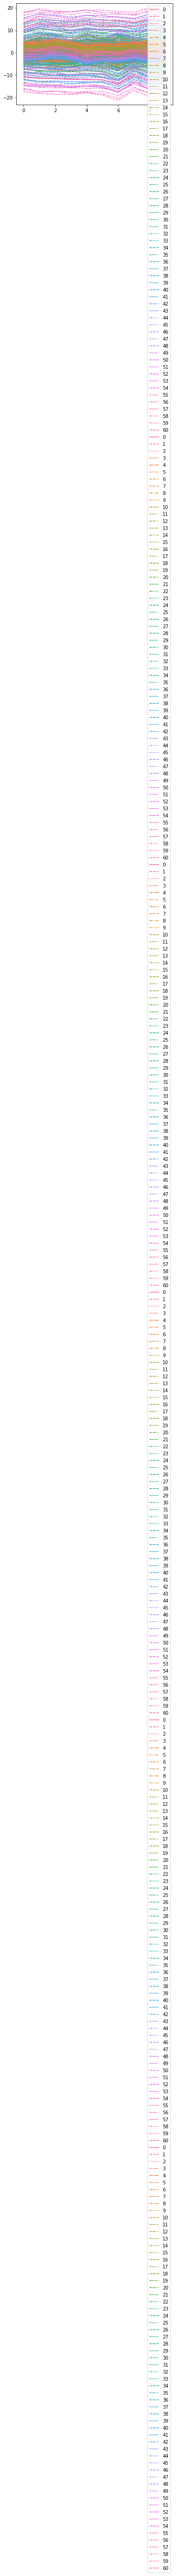

In [33]:
#
# from each main series build 'group_size' series
#
timeSeries = pd.read_csv("2020_MX_Region_Mobility_Report(1).csv",  encoding='latin-1')

ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
    ax = sns.lineplot(ax=ax, data=df.values,estimator=np.nanmean)


In [6]:
# Plotting time series
plt.show()

In [34]:
# Clustering with Linkage
Z = hac.linkage(timeSeries, method='single', metric='correlation')


ValueError: could not convert string to float: 'Mexico'

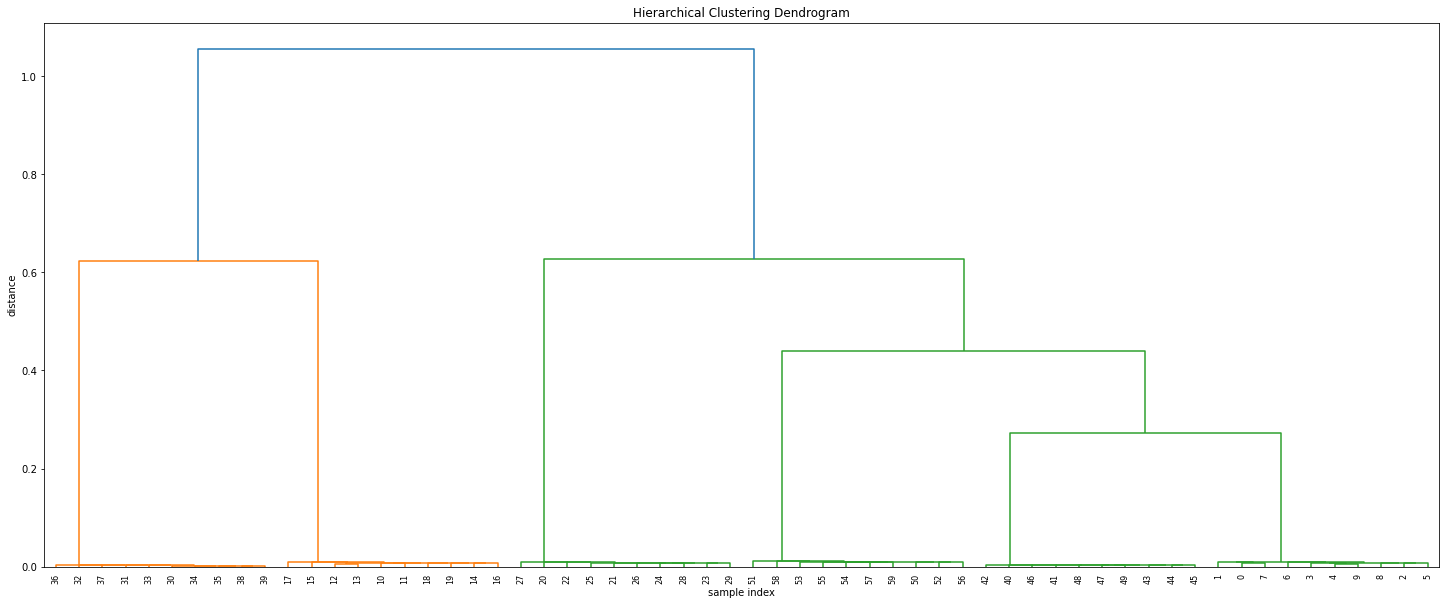

In [11]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [8]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.spearmanr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)


ValueError: could not convert string to float: 'Mexico'

NameError: name 'Z' is not defined

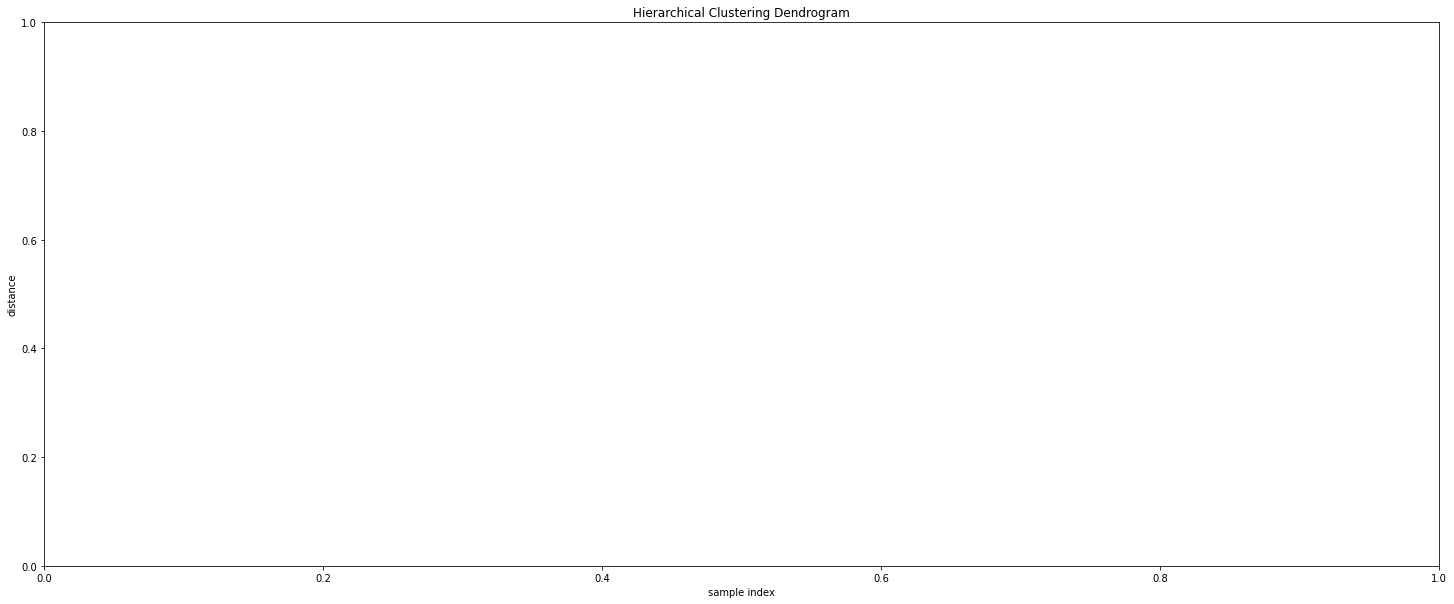

In [9]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [10]:
# Function for printing the distribution of elements in clusters and plotting together the clusters of time series

from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


In [11]:
# Call the function
print_clusters(timeSeries, Z, 6, plot=True)

NameError: name 'Z' is not defined

### Dynamic Time Warping

In [18]:
# pip install fastdtw


  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3595 sha256=793cb05e2fe360ac66721b45b8a8103e632c820bc3cf3f23ffa3e6ed9782a3e6
  Stored in directory: c:\users\aleja\appdata\local\pip\cache\wheels\e9\ac\30\c962f9d759dd68cb5482727c44441fdfb48040fdbe983857e8
Successfully built fastdtw


In [19]:
# Example of DTW
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

x = np.array([1, 2, 3, 3, 7])
y = np.array([1, 2, 2, 2, 2, 2, 2, 4])

distance, path = fastdtw(x, y, dist=euclidean)

print(distance)
print(path)


5.0
[(0, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (3, 7), (4, 7)]


In [20]:
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

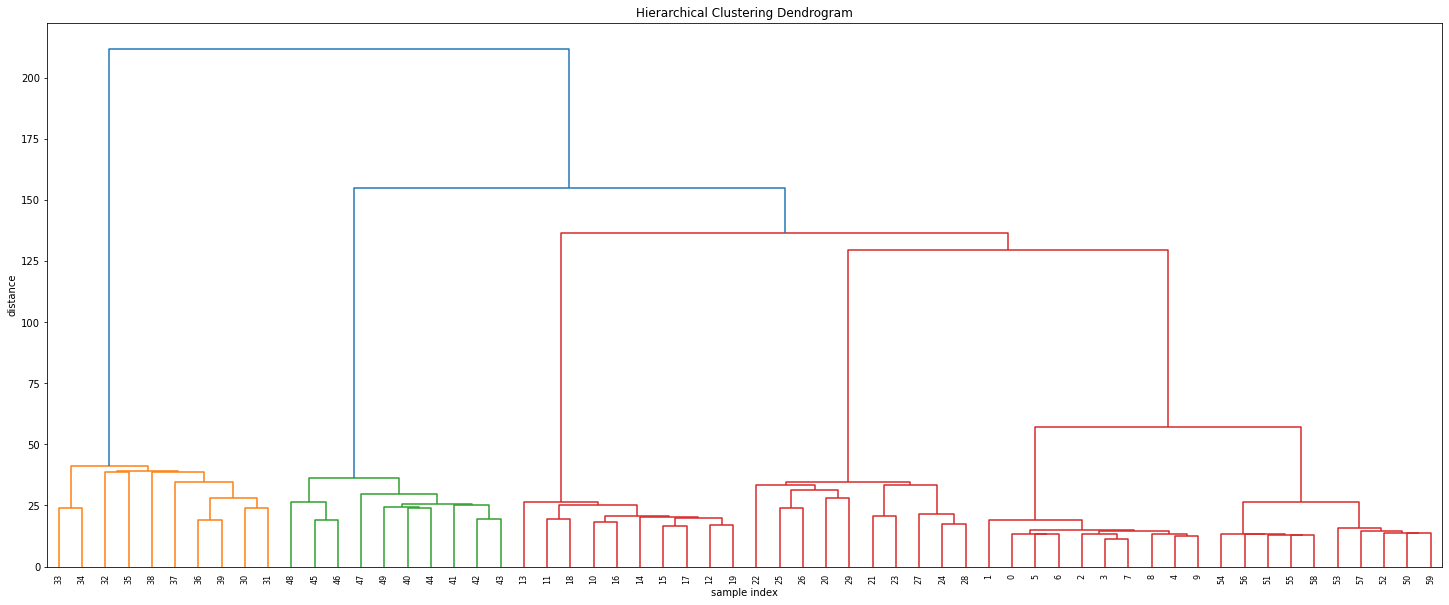

In [21]:
# Do the clustering with DTW
Z = hac.linkage(timeSeries,  method='single', metric=dtw)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [22]:
# Print time series clusters for k=6
print_clusters(timeSeries, Z, 6, plot=False)

[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6]
Cluster 5 number of entries 10
Cluster 3 number of entries 10
Cluster 4 number of entries 10
Cluster 1 number of entries 10
Cluster 2 number of entries 10
Cluster 6 number of entries 10


#### Compare with previous clusterings
- Are all time series clustered equally using DTW?
- Is the distance scale the same?
- Is the distance between similar series shorter or larger with DTW?

In [23]:
# Print time series clusters for k=5
print_clusters(timeSeries, Z, 5, plot=False)

[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5]
Cluster 5 number of entries 20
Cluster 3 number of entries 10
Cluster 4 number of entries 10
Cluster 1 number of entries 10
Cluster 2 number of entries 10


#### Answer the following questions
- Which clusters are merged by DTW with k=5? Why???
- Both Correlation and DTW merge the same series?

In [24]:
# Show clusters with k=5
print_clusters(timeSeries, Z, 5, plot=False)

[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5]
Cluster 5 number of entries 20
Cluster 3 number of entries 10
Cluster 4 number of entries 10
Cluster 1 number of entries 10
Cluster 2 number of entries 10


[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5]
Cluster 5 number of entries 20


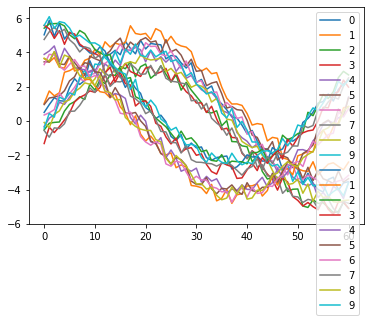

Cluster 3 number of entries 10


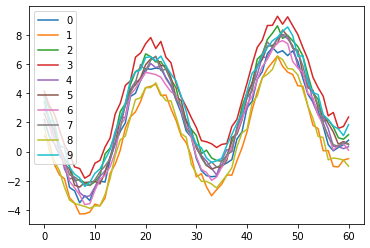

Cluster 4 number of entries 10


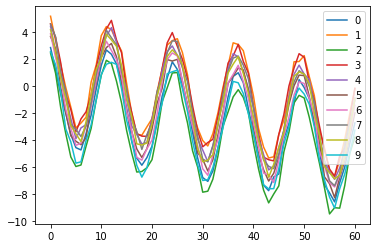

Cluster 1 number of entries 10


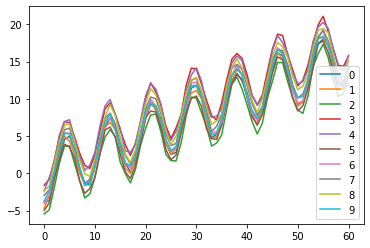

Cluster 2 number of entries 10


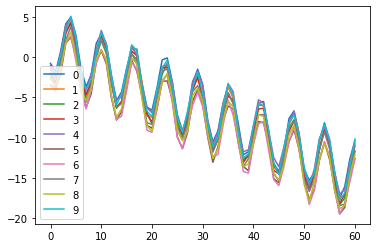

In [25]:
# Plot clusters with k=5
print_clusters(timeSeries, Z, 5, plot=True)

### Discuss
- How could you use clustering information?
- Which method should you choose?
- On which scenarios it could be usefull this technique?

1.	Analyze the Google Mobility Report of Mexico (2020_MX_Region_Mobility_Report.csv  download )
A.	Extract time series for each state and indicator
B.	Plot the Residential time series for all states
2.	Apply Hierarchical Clustering for Time Series in order to identify those states with similar behaviors in the time series Residential.
A.	Use the method Ward with Euclidean distance to find 5 clusters.
B.	Plot the dendogram
C.	At which distance you must cut off for finding the 5 clusters?
D.	Using the method Single with the metrics: Pearson Correlation, Spearman Correlation and Dynamic Time Warpping
E.	Plot the 3 dendograms
F.	On each one of the last three clusterings using the single method, which are the 3 states with the oddest behavior (more different from the rest). See [1] for more information on Dendograms.
G.	Which of the 4 clustering configurations provide the most balanced distribution, i.e. where the clusters have approximately the same number of states.
3.	Discuss, why it would be convenient to group together Mexico states during COVID-19 pandemia using this mobility report?
4.	Submit your results and conclusions in a PDF file and attach a Jupyter notebook with your solution. People working in teams can deliver the same report.
